# Predefined styles in Magics, ERA5 NetCDF data example

Magics comes with number of ways to define shading when visualizing your data.  
If you want full control you can choose number of levels, the way levels are calculated, contours or no contours, shading or no shading, type of shading, showing grid values or not. Magics doesn't lack number of parameters you can set!

Many times, we don't have time to make a style that fits partucular data, we just want to inspect data for further use. For this purpose Magics has built in predefined styles for large number of meteorological and climatological variables.

## First import Magics, cdsapi and the other libraries

Aside of Magics, in this Notebook we will use couple of libraries to make work easier.  

**cdsapi** to download data from Climate Data Store. All the data on CDS are free to use, but make sure you have an account and api key, and accept terms of service for the dataset you want to use, before the start.  
Documentation about **cdsapi** can be find [here](https://cds.climate.copernicus.eu/api-how-to.com "CDS API how to")  

**datetime** for work with date and time objects.  
**ipywidgets** for Jupyter Notebook widgets.  
**xarray** for extracting data and metadate from NetCDF file.  

At ECMWF make sure that Magics and cdsapi are loaded.  

In [2]:
import Magics.macro as magics
import cdsapi
import datetime
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox
import xarray as xr

`menus.py` contains the code got menus to choose parameter, type, date and time..  
We're just gonna run it here so our nice widgets work, but the code is not important for this excersize.

In [3]:
%run -i 'netcdf_menu.py'

display(VBox([box_auto]))



Here we have code for CDS API request.  
It uses parameters we have chosen before, so we don't have to change the code and so we reduce the posibility of an error.  
At the moment this request only works for pressure levels fields, and there is separate Notebook for surface fields. In future it might be merged in one Notebook.

In [70]:
c = cdsapi.Client()

a = c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'variable':[
            parameter.value
        ],
            'grid': ['0.2', '0.2'],
            'product_type': Type.value,
            'pressure_level' : level.value,
            'year': dates.value.year,
            'month': dates.value.month,
            'day': dates.value.day,
            'time': times.value,
        'format':'netcdf'
    },
                "download.nc"
    )

2018-10-11 09:08:54,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2018-10-11 09:08:54,813 INFO Request is queued
2018-10-11 09:08:55,821 INFO Request is running
2018-10-11 09:08:59,588 INFO Request is completed
2018-10-11 09:08:59,589 INFO Downloading http://136.156.132.110/cache-compute-0002/cache/data1/adaptor.mars.internal-1539245335.267453-25627-4-9615c028-bd22-4ecb-9bd8-c51dc6d0d77b.nc to download.nc (3.1M)
2018-10-11 09:08:59,676 INFO Download rate 35.8M/s


### Load netcdf data and set area, coaslines and default tittle:

When loading NetCDF file, we need to tell Magics exactly which variable we want to plot.  
We might need the help of **xarray** to check Netcdf variable name in our file, and pass it to Magics.

More about loading grib files in Magics can be found [here](https://confluence.ecmwf.int/display/MAGP/Netcdf+Input "NetCDF input")

In [71]:
ds = xr.open_mfdataset('download.nc')
variable_name = list(ds.data_vars)[0]

print('Variable to plot is: ', variable_name)
data =  magics.mnetcdf(netcdf_filename  = 'download.nc',
                      netcdf_value_variable = variable_name)

Variable to plot is:  r


In [9]:
areas = magics.predefined_areas()
Area = widgets.Dropdown(options=areas, value = 'europe', description='Predefined areas:', style=style)
display(Area)

Dropdown(description='Predefined areas:', index=15, options=('north_pole', 'eurasia', 'global', 'south_west_eu…

In [72]:
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = Area.value
)

coast = magics.mcoast(map_grid =  "on",
                      map_grid_colour  =  "charcoal",
                      map_coastline  =  'on',
                      map_coastline_colour =  'navy',
                      map_boundaries = 'on',
                      map_boundaries_colour = 'navy',
                      map_coastline_resolution = 'high'
            )
title = magics.mtext()
legend = magics.mlegend(legend_display_type = "continuous")

### Load predefined ECMWF contour setting:
Setting the parameter **contour_automatic_setting** to **'ecmwf'** will give us style developed at ECMWF for this parameter.  

More about contour settings in Magics can be found [here](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring")  

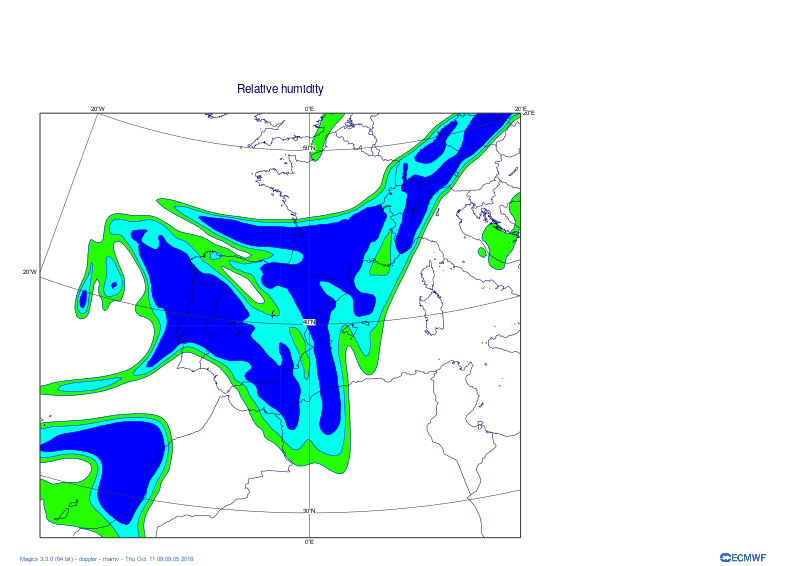

In [73]:
contour = magics.mcont(contour_automatic_setting = 'ecmwf')

magics.plot(projection, data, contour, legend, coast, title)

### How does Magics know which default style to apply?

Magics scans netcdf metadata and looks for standard_name and long_name. If more styles are found, Magics will choose the one with more keys matched. 

In [74]:
if 'standard_name' in ds[variable_name].attrs:
    print('We are plotting ', variable_name, ' and it has standard_name = ', ds[variable_name].attrs['standard_name'])
if 'long_name' in ds[variable_name].attrs:
    print('We are plotting ', variable_name, ' and it has long_name = ', ds[variable_name].attrs['long_name'])

We are plotting  r  and it has standard_name =  relative_humidity
We are plotting  r  and it has long_name =  Relative humidity


Some ERA5 parameters (that have representation in ecCharts) have more than one built in predefined styles.  
Run the next cell and choose a style.

In [75]:
styles = magics.wmsstyles(data, )
all_styles = []
for i in styles['styles']:
    all_styles.append(i["name"])

One_style = widgets.Dropdown(options=all_styles, value = all_styles[0], description='Choose a style:', style=style)
display(One_style)


Dropdown(description='Choose a style:', options=('sh_grnblu_f65t100i15', 'sh_grnblu_f65t100i15_light', 'ct_grn…

To use this new feature we need to set the parameter **contour_automatic_setting** to **'style_name'**, and add a new parameter **contour_style_name** with the chosen style. In this example it takes value choosen by the previous menu.

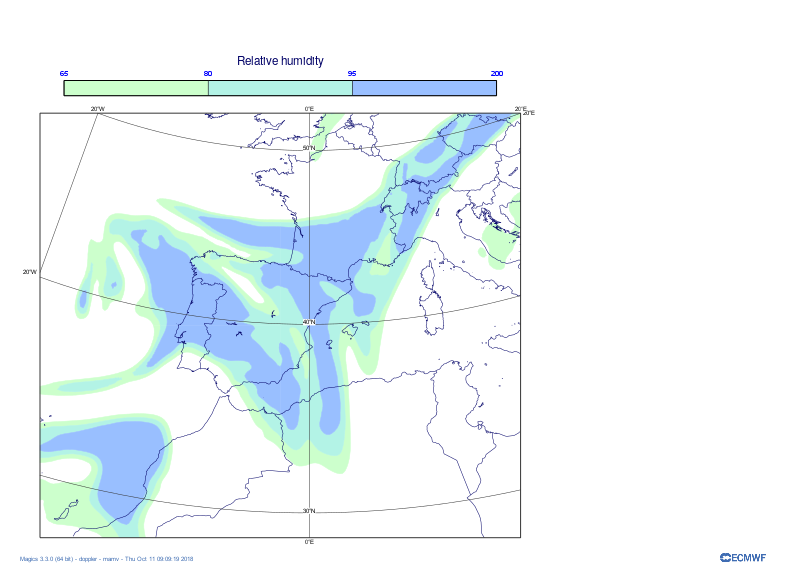

In [76]:
contour = magics.mcont(contour_automatic_setting = 'style_name',
                      contour_style_name = One_style.value,
                      legend = 'on')

magics.plot(projection, data, contour, coast, legend, title)

### Magics offers number of predefined palettes, for a bit more flexibility

It would be ideal if our number of levels matched number of colours in palette.  
If for any reason that is not the case, we can set parameter **contour_shade_palette_policy** to **'lastone'** or **'cycle'**, so Magics knows what to do if there are more levels than colours.   
Full list of Magics palletes can be found [here](https://confluence.ecmwf.int/display/MAGP/Predefined+palettes+in+Magics "Magics palettes")

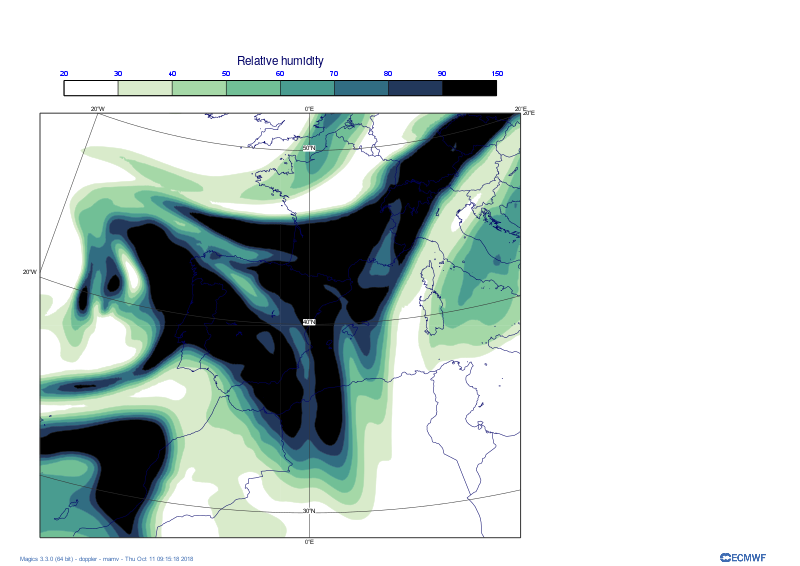

In [81]:
contour = magics.mcont(
    legend = 'on',
    contour = 'off',
    contour_shade = 'on',
    contour_label = 'off',
    contour_level_selection_type = 'level_list',
    contour_level_list = [20.00, 30.00, 40.00, 50.00, 60.00, 70.00, 80.00, 90.00, 150.00],
    contour_shade_method = 'area_fill',
    contour_shade_palette_name = 'm_blue_green_8',
    contour_shade_colour_method = 'palette'
)

magics.plot(projection, data, contour, legend, coast, title)

### If we want, we can have a full control, of course

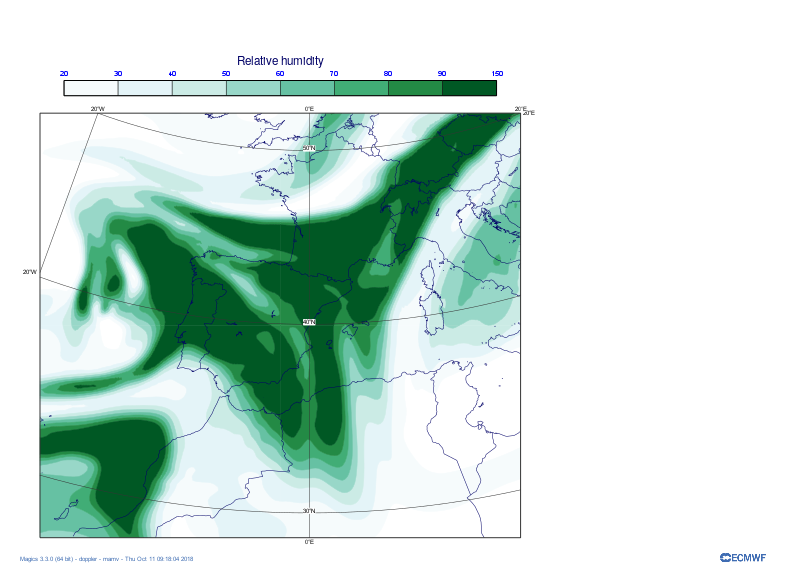

In [82]:
contour = magics.mcont(legend = "on",
                       contour = "off",
                       contour_label = "off",
                       contour_hilo = "off",
                       contour_level_selection_type = 'level_list',
                       contour_level_list = [20.00, 30.00, 40.00, 50.00, 60.00, 70.00, 80.00, 90.00, 150.00],    
                       contour_shade = "on",
                       contour_shade_method = "area_fill",
                       contour_shade_colour_method = "list",
                       contour_shade_colour_list = ['#f7fcfd','#e5f5f9','#ccece6',
                                                    '#99d8c9','#66c2a4','#41ae76',
                                                    '#238b45','#005824'])

magics.plot(projection, data, contour, legend, coast, title)